## Import the needed packages 

In [19]:
import pandas as pd 
import networkx as nt
import collections
import matplotlib.pyplot as plt
import numpy as np

## Import the data of the graph

In [2]:
data_user_user = pd.read_csv("./data/Social_spammers_dataset/graphs/c_combined_edges_w_1_s_0.9.csv")
data_user_app = pd.read_csv("./data/Social_spammers_dataset/graphs/app_based_similarity/app_user_interaction_graph/coded_weighted_edges.csv")
labels = pd.read_csv("./data/Social_spammers_dataset/users/coded_ids_labels_train.csv")

In [40]:
data_user_app.head()

,user_id,app_id,weight
0,1,23,9
1,1,33,391
2,362,200,192
3,362,23,8
4,488,176,61


In [41]:
data_user_user.head()

,Source,Target,Weight,Sim
0,1,168,30,0.975
1,4,56,13,0.974
2,149,244,12,1.000
3,198,244,4,1.000
4,1,244,16,1.000


In [5]:
labels.head()

labels_dict=labels.to_dict() 
labels_dict['label']

{0: 1,
 1: 0,
 2: 0,
 3: 1,
 4: 0,
 5: 1,
 6: 1,
 7: 0,
 8: 0,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 0,
 16: 1,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 1,
 24: 0,
 25: 1,
 26: 1,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 1,
 32: 0,
 33: 0,
 34: 0,
 35: 1,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 0,
 47: 0,
 48: 1,
 49: 1,
 50: 1,
 51: 0,
 52: 1,
 53: 1,
 54: 1,
 55: 0,
 56: 1,
 57: 0,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 66: 1,
 67: 1,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 1,
 74: 0,
 75: 0,
 76: 1,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 1,
 82: 1,
 83: 0,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 0,
 89: 0,
 90: 1,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 1,
 99: 1,
 100: 1,
 101: 1,
 102: 0,
 103: 0,
 104: 1,
 105: 1,
 106: 0,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 0,
 112: 1,
 113: 1,
 114: 1,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 1,
 12

In [57]:
labels_dict

{'coded_id': {0: 1,
  1: 2,
  2: 3,
  3: 4,
  4: 6,
  5: 7,
  6: 8,
  7: 9,
  8: 10,
  9: 11,
  10: 12,
  11: 13,
  12: 14,
  13: 15,
  14: 16,
  15: 17,
  16: 18,
  17: 19,
  18: 20,
  19: 21,
  20: 22,
  21: 23,
  22: 24,
  23: 25,
  24: 27,
  25: 28,
  26: 29,
  27: 30,
  28: 31,
  29: 32,
  30: 33,
  31: 34,
  32: 35,
  33: 36,
  34: 38,
  35: 39,
  36: 41,
  37: 42,
  38: 43,
  39: 44,
  40: 45,
  41: 46,
  42: 47,
  43: 48,
  44: 49,
  45: 50,
  46: 51,
  47: 53,
  48: 54,
  49: 55,
  50: 56,
  51: 57,
  52: 59,
  53: 60,
  54: 61,
  55: 62,
  56: 63,
  57: 64,
  58: 66,
  59: 68,
  60: 69,
  61: 70,
  62: 71,
  63: 72,
  64: 73,
  65: 74,
  66: 75,
  67: 76,
  68: 77,
  69: 78,
  70: 79,
  71: 80,
  72: 81,
  73: 82,
  74: 83,
  75: 84,
  76: 85,
  77: 87,
  78: 88,
  79: 89,
  80: 90,
  81: 91,
  82: 92,
  83: 93,
  84: 94,
  85: 95,
  86: 96,
  87: 97,
  88: 98,
  89: 99,
  90: 100,
  91: 101,
  92: 102,
  93: 103,
  94: 104,
  95: 105,
  96: 106,
  97: 107,
  98: 108,
  99: 1

In [4]:
graph_user_app = nt.from_pandas_edgelist(data_user_app,source="user_id",target="app_id")
graph_user_user = nt.from_pandas_edgelist(data_user_user,source="Source",target="Target")

# The metric of graph
In this section we will do the graph exploration by computing some metrics

In [46]:
print("Info graph user_app: ")
print(nt.info(graph_user_app))
print("Info graph user_app: ")
print(nt.info(graph_user_user))

Info graph user_app: 
Name: 
Type: Graph
Number of nodes: 767
Number of edges: 2021
Average degree:   5.2699
Info graph user_app: 
Name: 
Type: Graph
Number of nodes: 295
Number of edges: 1335
Average degree:   9.0508


### Computing the diameter and radius of the graph

In [50]:
print(f"radius: {nt.radius(graph_user_app)}")
print(f"diameter: {nt.diameter(graph_user_app)}")

radius: 4
diameter: 6


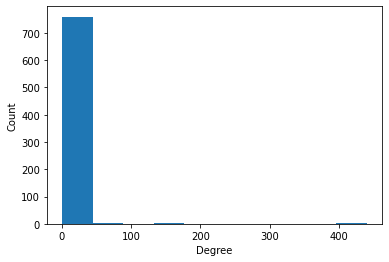

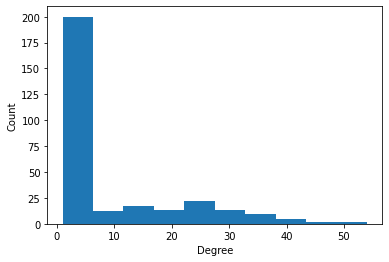

In [53]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()

plot_degree_dist(graph_user_app)
plot_degree_dist(graph_user_user)


### Compute the distribution of degree only with one class one time
First, we will separate the node in two sets: one for the spammers and another one for the non spammer

In [75]:
list_spam = []
list_non_spam = []
for node in graph_user_user.nodes():   
    if labels_dict['label'].get(node) is not None:
        if labels_dict['label'].get(node) ==1:
            list_spam.append(node)
            
for node in graph_user_user.nodes():   
    if labels_dict['label'].get(node) is not None:
       if labels_dict['label'].get(node) ==0:
            list_non_spam.append(node)    

In [76]:
list_non_spam

[1,
 168,
 4,
 149,
 244,
 198,
 185,
 34,
 229,
 239,
 238,
 260,
 18,
 196,
 91,
 237,
 233,
 183,
 236,
 251,
 434,
 362,
 588,
 654,
 636,
 361,
 573,
 411,
 648,
 668,
 269,
 144,
 295,
 315,
 282,
 257,
 33,
 17,
 463,
 267,
 20,
 240,
 205,
 171,
 160,
 265,
 309,
 479,
 550,
 194,
 187,
 241,
 465,
 339,
 570,
 444,
 321,
 543,
 669,
 350,
 462,
 173,
 529,
 47,
 600,
 643,
 367,
 371,
 8,
 255,
 38,
 533,
 102,
 179,
 424,
 223,
 30,
 250,
 19,
 306,
 615,
 57,
 513,
 268,
 563,
 293,
 407,
 338,
 572,
 24,
 77,
 36,
 310,
 155,
 601,
 496,
 480,
 552,
 201,
 662,
 21,
 51,
 215,
 261,
 634,
 280,
 617,
 325,
 27,
 264,
 530,
 447,
 415,
 675,
 593,
 106,
 580,
 318,
 130,
 448,
 584,
 547,
 607,
 262,
 214,
 188,
 103,
 656,
 559,
 646,
 469,
 562,
 568,
 307,
 641,
 326,
 623,
 305,
 453,
 672,
 377,
 435,
 55,
 79,
 231,
 70,
 68,
 71,
 72,
 497,
 74,
 75,
 78,
 119,
 80,
 516,
 532,
 83,
 247,
 92,
 89,
 180,
 93,
 94,
 95,
 403,
 342,
 191,
 266,
 618,
 391,
 387,
 121,
 

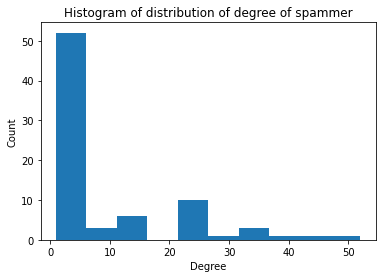

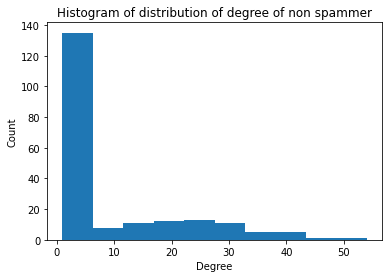

The mean of degree of the spammer: 9.692307692307692
The mean of degree of the non spammer: 9.178217821782178


In [83]:
import numpy as np
def plot_degree_dist(G, list_node, title):
    degrees = [G.degree(n) for n in list_node]
    plt.hist(degrees)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.title(title)
    plt.show()
    
plot_degree_dist(graph_user_user,list_spam,"Histogram of distribution of degree of spammer")
plot_degree_dist(graph_user_user,list_non_spam,"Histogram of distribution of degree of non spammer")


def compute_mean_of_degree(G, list_node):
    degrees = [G.degree(n) for n in list_node]
    return np.mean(degrees)

print ("The mean of degree of the spammer: {}".format(compute_mean_of_degree(graph_user_user,list_spam)))
print ("The mean of degree of the non spammer: {}".format(compute_mean_of_degree(graph_user_user,list_non_spam)))


We can constate that the mean of the degree of group of spammer is greate than the non spammer mean of degree
This observation allows us to say that the spammer share more edge than the non spammer.

### Compute the number of edges

### The mean of the degree

## Let compute the diameter of the graph

In [ ]:
### Let draw the histogram of degree of grah

26


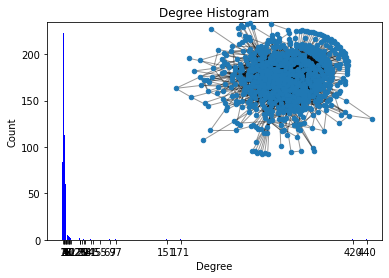

In [33]:
degree_sequence = sorted([d for n, d in our_graph.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
print(len(deg))
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = our_graph.subgraph(sorted(nt.connected_components(our_graph), key=len, reverse=True)[0])
pos = nt.spring_layout(our_graph)
plt.axis("off")
nt.draw_networkx_nodes(our_graph, pos, node_size=20)
nt.draw_networkx_edges(our_graph, pos, alpha=0.4)
plt.show()

Let compute the degree of centrality of each node 

In [85]:
degree_dict = nt.degree_centrality(graph_user_user)

In [87]:
np.mean([item for item in degree_dict.values()])

0.030785195434105843

In [92]:

list_to_compute_mean =[]
for node in degree_dict:   
    if labels_dict['label'].get(node) is not None:
        if labels_dict['label'].get(node) ==1:
            list_to_compute_mean.append(degree_dict[node])
print(" The mean of the centrality of spammer : {}".format(np.mean(list_to_compute_mean) ))       



list_to_compute_mean =[]
for node in degree_dict:   
    if labels_dict['label'].get(node) is not None:
        if labels_dict['label'].get(node) ==0:
            list_to_compute_mean.append(degree_dict[node])
print(" The mean of the centrality of non spammer : {}".format(np.mean(list_to_compute_mean) ))       


 The mean of the centrality of spammer : 0.03296703296703297
 The mean of the centrality of non spammer : 0.0312184279652455


In [98]:
betweeness = nt.betweenness_centrality(graph_user_user)

In [99]:
betweeness = dict(sorted(betweeness.items(), key=lambda item: item[1],reverse=True))

In [100]:
betweeness

{137: 0.03874929611434303,
 662: 0.027607729280086587,
 20: 0.026927047820564192,
 280: 0.022074730010480065,
 27: 0.02205957835810759,
 532: 0.01968739393359236,
 144: 0.018532508457886163,
 465: 0.017723768314352406,
 240: 0.01622422963632589,
 339: 0.01449653885601617,
 463: 0.013175961601142445,
 570: 0.01270823987910463,
 530: 0.01263030809593462,
 136: 0.011895572550293184,
 218: 0.010889733241843723,
 672: 0.00996134174954953,
 562: 0.00955399224536231,
 687: 0.009055565537878259,
 33: 0.008998947093465015,
 207: 0.008412901472110225,
 646: 0.0064450794893775015,
 130: 0.006423502279182436,
 718: 0.006408023960437418,
 377: 0.006408023960437418,
 677: 0.006408023960437418,
 9: 0.0062626956877339735,
 179: 0.0058072292656434115,
 223: 0.0053074462450844705,
 309: 0.0051528820291327085,
 114: 0.005037181145914093,
 315: 0.004942457847298208,
 241: 0.004890718853031976,
 160: 0.004616049842272024,
 172: 0.004381639724312585,
 17: 0.004347401383491994,
 588: 0.0041655590570725464,
 

In [104]:
labels_dict['label'].get(280)

0

In [ ]:
for node in degree_dict:   
    if labels_dict['label'].get(node) is not None:
        if labels_dict['label'].get(node) ==1:
            list_to_compute_mean.append(degree_dict[node])

1
168
4
56
149
244
198
48
25
232
185
34
229
239
238
260
170
18
196
91
237
233
183
236
251
122
60
434
362
588
654
636
361
573
411
762
648
668
269
144
295
315
282
220
257
137
227
33
17
463
267
3
20
240
205
218
171
160
265
204
309
45
129
84
35
479
550
194
226
187
241
98
147
465
339
570
444
321
543
669
350
718
462
173
529
47
600
746
643
367
711
371
8
255
192
169
26
197
9
38
136
533
102
219
179
41
424
223
207
114
30
250
19
42
695
687
306
615
138
10
57
87
53
146
11
513
268
563
761
16
82
293
407
338
572
24
77
36
699
310
90
155
601
496
480
552
201
172
662
21
51
215
23
261
634
280
617
325
27
264
530
447
165
415
675
593
698
106
580
318
31
130
448
584
547
607
262
214
188
103
43
211
656
740
559
646
469
562
568
307
641
326
623
305
453
672
377
435
49
55
52
79
231
61
59
66
70
63
68
65
64
67
71
72
73
497
74
76
75
78
104
81
119
80
516
532
696
206
83
247
92
108
86
110
109
89
180
166
93
99
94
95
403
342
101
191
266
105
618
391
688
387
737
121
190
125
126
124
738
286
132
195
133
660
164
245
182
142
200
16

In [11]:
closeness = nt.closeness_centrality(graph_user_user)

In [13]:
closeness = dict(sorted(closeness.items(), key=lambda item: item[1],reverse=True))

In [14]:
closeness

{137: 0.2331002331002331,
 240: 0.22002200220022,
 144: 0.2185792349726776,
 136: 0.21030494216614087,
 33: 0.20833333333333331,
 463: 0.20639834881320948,
 241: 0.20449897750511248,
 309: 0.2038735983690112,
 17: 0.2032520325203252,
 223: 0.19960079840319359,
 218: 0.1984126984126984,
 257: 0.19782393669634027,
 20: 0.1972386587771203,
 179: 0.196078431372549,
 267: 0.19550342130987292,
 102: 0.1943634596695821,
 9: 0.19379844961240308,
 138: 0.19379844961240308,
 220: 0.1926782273603083,
 3: 0.1926782273603083,
 227: 0.19212295869356388,
 207: 0.19157088122605365,
 315: 0.1910219675262655,
 465: 0.19047619047619047,
 87: 0.19047619047619047,
 339: 0.18993352326685659,
 321: 0.18939393939393936,
 129: 0.18885741265344663,
 36: 0.18885741265344663,
 19: 0.18779342723004694,
 24: 0.18779342723004694,
 77: 0.18726591760299624,
 160: 0.18674136321195142,
 293: 0.18674136321195142,
 407: 0.18674136321195142,
 338: 0.18674136321195142,
 572: 0.18674136321195142,
 699: 0.18674136321195142,
 

In [17]:
list_to_compute_mean =[]
for node in closeness:   
    if labels_dict['label'].get(node) is not None:
        if labels_dict['label'].get(node) ==1:
            list_to_compute_mean.append(closeness[node])

In [20]:
print("the mean of clossness of spammmer {}",np.mean(list_to_compute_mean))

the mean of clossness of spammmer {} 0.08221274876513192


In [21]:
list_to_compute_mean =[]
for node in closeness:   
    if labels_dict['label'].get(node) is not None:
        if labels_dict['label'].get(node) ==0:
            list_to_compute_mean.append(closeness[node])

In [22]:
print("the mean of clossness of non spammmer {}",np.mean(list_to_compute_mean))

the mean of clossness of non spammmer {} 0.08526386823516259


## Link analysis

### Page rank 

In [24]:
page_rank=nt.pagerank(graph_user_user)

In [25]:
print(page_rank)

{1: 0.003551501281123486, 168: 0.0036702104962443548, 4: 0.0033898305084745757, 56: 0.0033898305084745757, 149: 0.003551501281123486, 244: 0.003551501281123486, 198: 0.0032806614272859603, 48: 0.003551501281123486, 25: 0.003551501281123486, 232: 0.003669491183449409, 185: 0.003551501281123486, 34: 0.003551501281123486, 229: 0.0035329637288100757, 239: 0.0035515012811234863, 238: 0.003551501281123486, 260: 0.0034136159411735285, 170: 0.0035515012811234863, 18: 0.003551501281123486, 196: 0.0035515012811234863, 91: 0.003413615941173528, 237: 0.003551501281123486, 233: 0.0034136159411735285, 183: 0.0035515012811234863, 236: 0.003551501281123486, 251: 0.00274493534868559, 122: 0.00341790819472024, 60: 0.0009162252922959105, 434: 0.0028823976060131954, 362: 0.0017335309435095052, 588: 0.004518187066028181, 654: 0.001148660866742523, 636: 0.0026014094319968036, 361: 0.0049666726614301165, 573: 0.0026014094319968036, 411: 0.0031069123408447217, 762: 0.0013889092284500592, 648: 0.00148759466677

In [27]:
# the max page_rank
import operator
max_page_rank =max(page_rank.items(), key=operator.itemgetter(1))[0]

In [29]:
labels_dict['label'].get(max_page_rank)

1

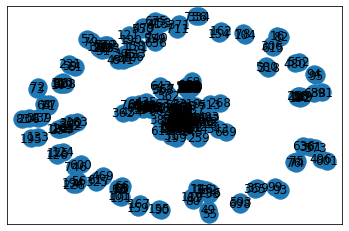

In [31]:
nt.draw_networkx(graph_user_user)

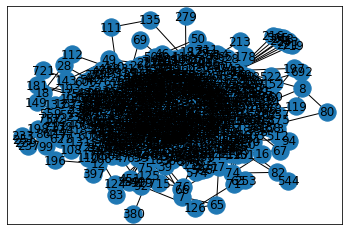

In [32]:
nt.draw_networkx(graph_user_app)